<h1>FIFA 23 ML Project</h1>

In [86]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
data = pd.read_csv("./players_fifa23_cleaned.csv")
data.head()

,Name,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,BestPosition,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,L. Messi,35,169,67,91,91,0,2190,452,0,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,34,185,81,91,91,0,2147,455,1,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,33,185,81,91,91,0,2205,458,2,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,31,181,70,91,91,0,2303,483,3,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,23,182,73,91,95,4,2177,470,2,...,92,84,92,70,66,70,66,57,66,21


In [88]:
X = data.drop(["Name", "BestPosition"], axis = 1)
Y = pd.DataFrame(data["BestPosition"])

<h3>Hnadle Imbalanced Data:</h3>

In [89]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X, Y = sm.fit_resample(X, Y)

In [90]:
print(f' X_shape: {X.shape} \n y_shape: {Y.shape}')

 X_shape: (54600, 78) 
 y_shape: (54600, 1)


<AxesSubplot:xlabel='BestPosition', ylabel='count'>

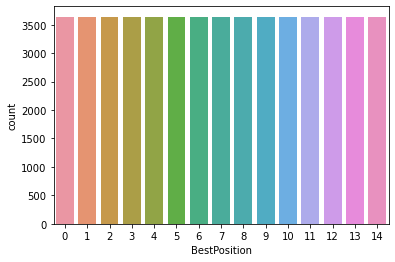

In [91]:
sns.countplot(x="BestPosition", data = Y)

<h3>Feature Scaling:</h3>

In [92]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X = mms.fit_transform(X)

<h3>Perform Dimentionality Reduction:</h3>

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 45) 
X = pd.DataFrame(pca.fit_transform(X))

<h3>Split the Data to Train and Test sets:</h3>

In [94]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.20, random_state=42)

<h2>Modeling: </h2>

<h3>1. Logistic Regression: </h3>

In [95]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [96]:
lr.fit(X_Train , Y_Train)

d:\anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
lr.score(X_Train, Y_Train)

0.778937728937729

In [98]:
lr.score(X_Test, Y_Test)

0.7791208791208791

In [99]:
Y_Pred = lr.predict(X_Test)

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Function to check the classification report
def classification_report_fun(model_name, actual, predicted):
    print(f'The Classification Report for {model_name} Classifier:')
    print(classification_report(actual, predicted))

In [101]:
accuracy_score(Y_Test, Y_Pred)*100

77.91208791208791

In [102]:
classification_report_fun('Logistic Regression', Y_Test, Y_Pred)

The Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       704
           1       0.85      0.97      0.91       740
           2       0.95      0.91      0.93       692
           3       0.83      0.92      0.87       700
           4       0.56      0.54      0.55       720
           5       1.00      1.00      1.00       764
           6       0.96      0.92      0.94       721
           7       0.59      0.59      0.59       755
           8       0.90      0.91      0.90       727
           9       0.69      0.65      0.67       745
          10       0.72      0.72      0.72       745
          11       0.74      0.71      0.72       734
          12       0.69      0.68      0.68       701
          13       0.69      0.73      0.71       730
          14       0.70      0.73      0.71       742

    accuracy                           0.78     10920
   macro avg      